<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data 

In [2]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional,Dropout,Flatten
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/project')

In [5]:
#reading json data
sardf = pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)

### Drop `article_link` from dataset 

In [6]:
#dropping article_link
sarnewdf = sardf.drop(['article_link'],axis=1)

### Get length of each headline and add a column for 

1.   List item
2.   List item

that 

In [7]:
sarnewdf['headline'].str.len()

0        78
1        84
2        79
3        84
4        64
         ..
26704    36
26705    23
26706    21
26707    60
26708    33
Name: headline, Length: 26709, dtype: int64

In [10]:
#creating new column with the length of the headline column
sarnewdf['headline1'] = sarnewdf['headline'].apply(lambda s:s.split())

In [11]:
sarnewdf['length'] = sarnewdf['headline1'].str.len()

In [12]:
#converting to lower character
sarnewdf['headline'] = sarnewdf['headline'].apply(lambda s: s.lower())

In [13]:
specialcharc = '{}[]/?*&^%$#@!~.,_-'


In [14]:
sarnewdf.headline.str.strip(specialcharc).astype(bool).any()


True

In [15]:
sarnewdf['headline'][1:10]


1    the 'roseanne' revival catches up to our thorn...
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
5                          advancing the world's women
6       the fascinating case for eating lab-grown meat
7    this ceo will send your kids to school, if you...
8    top snake handler leaves sinking huckabee camp...
9    friday's morning email: inside trump's presser...
Name: headline, dtype: object

In [16]:
#keeping only letters and removing other special characters and numbers
sarnewdf['headline'] = sarnewdf['headline'].apply(lambda s: re.sub('[^a-z ]','',s))


In [17]:
sarnewdf['headline'][1:10]

1    the roseanne revival catches up to our thorny ...
2    mom starting to fear sons web series closest t...
3    boehner just wants wife to listen not come up ...
4    jk rowling wishes snape happy birthday in the ...
5                           advancing the worlds women
6        the fascinating case for eating labgrown meat
7    this ceo will send your kids to school if you ...
8    top snake handler leaves sinking huckabee camp...
9    fridays morning email inside trumps presser fo...
Name: headline, dtype: object

In [ ]:
#removing spaces
sarnewdf['headline'] = sarnewdf['headline'].apply(lambda s: s.strip())


In [18]:
sarnewdf['headline'][1:10]

1    the roseanne revival catches up to our thorny ...
2    mom starting to fear sons web series closest t...
3    boehner just wants wife to listen not come up ...
4    jk rowling wishes snape happy birthday in the ...
5                           advancing the worlds women
6        the fascinating case for eating labgrown meat
7    this ceo will send your kids to school if you ...
8    top snake handler leaves sinking huckabee camp...
9    fridays morning email inside trumps presser fo...
Name: headline, dtype: object

In [ ]:
# !pip install stopwords

In [ ]:
# import nltk
# nltk.download("popular")

In [ ]:
# import stopwords
# from nltk.corpus import stopwords
# print(stopwords.words('english'))


In [ ]:
# stop_words = set(stopwords.words('english')) 
# #Below stop words are present in the text
# sarnewdf['headline'].apply(lambda x: ' '.join([text for text in x.split() if text in stop_words]))

In [ ]:
# #removing emoji's and converting short form of words to full form
# def clean_text(text):
    
#     text = " ".join(filter(lambda x:x[0]!='@', text.split()))
#     emoji = re.compile("["
#                            u"\U0001F600-\U0001FFFF"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
    
#     text = emoji.sub(r'', text)
#     text = text.lower()
#     text = re.sub(r"i'm", "i am", text)
#     text = re.sub(r"he's", "he is", text)
#     text = re.sub(r"she's", "she is", text)
#     text = re.sub(r"that's", "that is", text)        
#     text = re.sub(r"what's", "what is", text)
#     text = re.sub(r"where's", "where is", text) 
#     text = re.sub(r"\'ll", " will", text)  
#     text = re.sub(r"\'ve", " have", text)  
#     text = re.sub(r"\'re", " are", text)
#     text = re.sub(r"\'d", " would", text)
#     text = re.sub(r"\'ve", " have", text)
#     text = re.sub(r"won't", "will not", text)
#     text = re.sub(r"don't", "do not", text)
#     text = re.sub(r"did't", "did not", text)
#     text = re.sub(r"can't", "can not", text)
#     text = re.sub(r"it's", "it is", text)
#     text = re.sub(r"couldn't", "could not", text)
#     text = re.sub(r"have't", "have not", text)
#     text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
#     return text

In [ ]:
# #removing stop words
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# def CleanTokenize(df):
#     head_lines = list()
#     lines = sarnewdf["headline"].values.tolist()

#     for line in lines:
#         line = clean_text(line)
#         # tokenize the text
#         tokens = word_tokenize(line)
#         # remove puntuations
#         table = str.maketrans('', '', string.punctuation)
#         stripped = [w.translate(table) for w in tokens]
#         # remove non alphabetic characters
#         words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         # remove stop words
#         words = [w for w in words if not w in stop_words]
#         head_lines.append(words)
#     return head_lines

# head_lines = CleanTokenize(sarnewdf)
# head_lines[0:10]

In [ ]:
#forming text after removing stop words from it
#sarnewdf['headline1'] = sarnewdf['headline'].apply(lambda x: ' '.join([text for text in x.split() if text not in stop_words]))

In [ ]:
# #looking at most occuring words
# from collections import Counter
# from wordcloud import WordCloud, ImageColorGenerator
# pos_data = sarnewdf.loc[sarnewdf['is_sarcastic'] == 1]

# pos_lines = [j for sub in pos_data for j in sub] 
# word_could_dict=Counter(pos_lines)

# wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud)
# plt.axis("off")

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

### Apply `tensorflow.keras` Tokenizer and get indices 



for words 
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# padding_type='post'
# oov_tok='<oov>'

In [20]:
max_features = 10000
maxlen = 25
embedding_size = 200
trunc_type='post'



In [21]:
#fitting tokenizer object column and converting it to sequences
tokenizer = Tokenizer(max_features)
tokenizer.fit_on_texts(sarnewdf['headline'])
sequences = tokenizer.texts_to_sequences(sarnewdf['headline'])



### Pad sequences 
- Pad each example with a maximum length
- Convert target column into numpy array

In [22]:
#padding zeros to make all words of same length,using post padding
#forming features and labels
lines_pad = pad_sequences(sequences, maxlen=maxlen, padding='post' )




In [23]:
#converting target into numpy array
sentiment =  sarnewdf['is_sarcastic'].values
sentiment

array([0, 0, 1, ..., 0, 0, 0])

### Vocab mapping
- There is no word for 0th index

In [24]:
word_index = tokenizer.word_index
print("unique tokens - ",len(word_index))

unique tokens -  27629


In [25]:
word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'be': 21,
 'how': 22,
 'out': 23,
 'it': 24,
 'that': 25,
 'as': 26,
 'up': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'what': 31,
 'his': 32,
 'he': 33,
 'just': 34,
 'who': 35,
 'us': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'all': 40,
 'report': 41,
 'into': 42,
 'one': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'says': 49,
 'day': 50,
 'woman': 51,
 'can': 52,
 'its': 53,
 'time': 54,
 'no': 55,
 'first': 56,
 'like': 57,
 'get': 58,
 'her': 59,
 'trumps': 60,
 'people': 61,
 'an': 62,
 'i': 63,
 'now': 64,
 'obama': 65,
 'house': 66,
 'off': 67,
 'life': 68,
 'make': 69,
 'still': 70,
 'women': 71,
 'was': 72,
 'than': 73,
 'my': 74,
 'white': 75,
 'we': 76,
 'back': 77,
 'clinton': 78,
 'down': 79,
 'if': 80,
 'when': 81,
 

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [26]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

27630


In [28]:
print('Found %s word vectors.' % len(embeddings))


Found 400000 word vectors.


### Load Glove Word Embeddings 



```
# This is formatted as code
```




### Create embedding matrix

In [27]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model 
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [29]:
#forming embedding layer and assigning weights calculated from the Glove object
embedding_layer = Embedding(num_words,
                            embedding_size,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)

In [32]:
#model3, using 2 bidirectional LSTM with reutrn sequences
model = Sequential()
model.add(embedding_layer)
#model.add(tf.keras.layers.SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(400, return_sequences = True,dropout=0.2, recurrent_dropout=0.25) , merge_mode ='sum'))
#model.add(Bidirectional(LSTM(150, return_sequences = True) , merge_mode ='concat'))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.25) , merge_mode ='sum'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(lines_pad, sentiment, batch_size=100, epochs=25, verbose=2)


Epoch 1/25
268/268 - 94s - loss: 0.4830 - acc: 0.7652
Epoch 2/25
268/268 - 87s - loss: 0.3690 - acc: 0.8357
Epoch 3/25
268/268 - 87s - loss: 0.3121 - acc: 0.8661
Epoch 4/25
268/268 - 87s - loss: 0.2708 - acc: 0.8869
Epoch 5/25
268/268 - 86s - loss: 0.2262 - acc: 0.9040
Epoch 6/25
268/268 - 87s - loss: 0.1918 - acc: 0.9221
Epoch 7/25
268/268 - 91s - loss: 0.1583 - acc: 0.9372
Epoch 8/25
268/268 - 89s - loss: 0.1297 - acc: 0.9475
Epoch 9/25
268/268 - 87s - loss: 0.1031 - acc: 0.9588
Epoch 10/25
268/268 - 87s - loss: 0.0865 - acc: 0.9666
Epoch 11/25
268/268 - 87s - loss: 0.0658 - acc: 0.9748
Epoch 12/25
268/268 - 87s - loss: 0.0590 - acc: 0.9774
Epoch 13/25
268/268 - 88s - loss: 0.0453 - acc: 0.9822
Epoch 14/25
268/268 - 88s - loss: 0.0414 - acc: 0.9848
Epoch 15/25
268/268 - 88s - loss: 0.0436 - acc: 0.9842
Epoch 16/25
268/268 - 87s - loss: 0.0298 - acc: 0.9893
Epoch 17/25
268/268 - 88s - loss: 0.0280 - acc: 0.9900
Epoch 18/25
268/268 - 89s - loss: 0.0268 - acc: 0.9904
Epoch 19/25
268/268

In [ ]:
Model accuracy on training data is 99%

In [38]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           5526000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 25, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               641600    
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [34]:
#forming train,test data to check model accuracy on validation data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(lines_pad,sentiment,test_size=0.20,random_state=45)

In [ ]:
#creating sequential model
#using one bidirectional LSTM without return sequence
#model1
model = Sequential()
model.add(embedding_layer)
model.add(tf.keras.layers.SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(embedding_size, dropout=0.2, recurrent_dropout=0.25)))
model.add(Flatten())
model.add(Dense(embedding_size, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [35]:
print('Shape of X_train_pad:', X_train.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (21367, 25)
Shape of y_train: (21367,)
Shape of X_test_pad: (5342, 25)
Shape of y_test: (5342,)


In [68]:

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 200)           5526000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 25, 200)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 400)               641600    
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)         

### Fit the model 

In [69]:
history = model.fit(X_train, y_train, batch_size=100, epochs=25, validation_data=(X_test, y_test), verbose=2)


Epoch 1/25
214/214 - 45s - loss: 0.5457 - acc: 0.7167 - val_loss: 0.4341 - val_acc: 0.7995
Epoch 2/25
214/214 - 40s - loss: 0.4402 - acc: 0.7931 - val_loss: 0.3775 - val_acc: 0.8265
Epoch 3/25
214/214 - 41s - loss: 0.3809 - acc: 0.8336 - val_loss: 0.3937 - val_acc: 0.8162
Epoch 4/25
214/214 - 40s - loss: 0.3436 - acc: 0.8489 - val_loss: 0.3108 - val_acc: 0.8611
Epoch 5/25
214/214 - 40s - loss: 0.3164 - acc: 0.8618 - val_loss: 0.3173 - val_acc: 0.8637
Epoch 6/25
214/214 - 39s - loss: 0.2908 - acc: 0.8728 - val_loss: 0.3143 - val_acc: 0.8652
Epoch 7/25
214/214 - 40s - loss: 0.2655 - acc: 0.8869 - val_loss: 0.3276 - val_acc: 0.8609
Epoch 8/25
214/214 - 40s - loss: 0.2481 - acc: 0.8943 - val_loss: 0.3140 - val_acc: 0.8701
Epoch 9/25
214/214 - 40s - loss: 0.2262 - acc: 0.9061 - val_loss: 0.3136 - val_acc: 0.8738
Epoch 10/25
214/214 - 41s - loss: 0.2071 - acc: 0.9142 - val_loss: 0.3238 - val_acc: 0.8662
Epoch 11/25
214/214 - 41s - loss: 0.1896 - acc: 0.9229 - val_loss: 0.3141 - val_acc: 0.87

model accuracy on validation data is 88%

In [36]:
#model3, using 2 bidirectional LSTM with reutrn sequences and merge mode as sum
model = Sequential()
model.add(embedding_layer)
#model.add(tf.keras.layers.SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(400, return_sequences = True,dropout=0.2, recurrent_dropout=0.25) , merge_mode ='sum'))
#model.add(Bidirectional(LSTM(150, return_sequences = True) , merge_mode ='concat'))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.25) , merge_mode ='sum'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
214/214 - 82s - loss: 0.5033 - acc: 0.7505 - val_loss: 0.4078 - val_acc: 0.8079
Epoch 2/20
214/214 - 75s - loss: 0.3845 - acc: 0.8256 - val_loss: 0.3772 - val_acc: 0.8308
Epoch 3/20
214/214 - 73s - loss: 0.3222 - acc: 0.8606 - val_loss: 0.3772 - val_acc: 0.8330
Epoch 4/20
214/214 - 74s - loss: 0.2827 - acc: 0.8802 - val_loss: 0.3210 - val_acc: 0.8568
Epoch 5/20
214/214 - 73s - loss: 0.2383 - acc: 0.9000 - val_loss: 0.3260 - val_acc: 0.8624
Epoch 6/20
214/214 - 73s - loss: 0.2022 - acc: 0.9167 - val_loss: 0.3282 - val_acc: 0.8686
Epoch 7/20
214/214 - 73s - loss: 0.1658 - acc: 0.9329 - val_loss: 0.3575 - val_acc: 0.8581
Epoch 8/20
214/214 - 73s - loss: 0.1337 - acc: 0.9472 - val_loss: 0.3767 - val_acc: 0.8663
Epoch 9/20
214/214 - 73s - loss: 0.1130 - acc: 0.9562 - val_loss: 0.4185 - val_acc: 0.8611
Epoch 10/20
214/214 - 73s - loss: 0.0846 - acc: 0.9671 - val_loss: 0.4980 - val_acc: 0.8534
Epoch 11/20
214/214 - 73s - loss: 0.0729 - acc: 0.9715 - val_loss: 0.5041 - val_acc: 0.86

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           5526000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 25, 400)           1923200   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100)               400800    
_________________________________________________________________
flatten_4 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

Validation accuracy is 88%

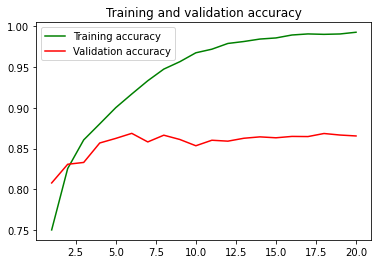

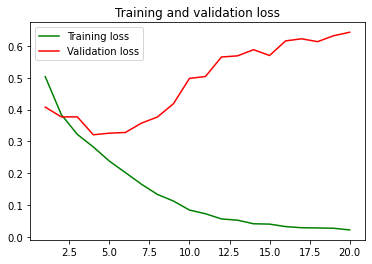

In [39]:
#using Model3
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
def predict_sarcasm(s):
    x_final = pd.DataFrame({"headline":[s]})
    
    test_sequences = tokenizer.texts_to_sequences(x_final)
    test_review_pad = pad_sequences(test_sequences, maxlen=maxlen, padding='post')
    pred = model.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: return "It's a sarcasm!" 
    else: return "It's not a sarcasm."

In [ ]:
X_test_pad[200:201]

In [41]:
predict_sarcasm(X_test[1:2])

"It's a sarcasm!"

In [42]:
predict_sarcasm("I am an Indian. I am very happy because India lost the match by 1 runs.")


"It's a sarcasm!"

In [43]:
predict_sarcasm("You just broke my car window. Great job.")


"It's a sarcasm!"

Conclusion : we predicted sarcasm or not using bidirectional LSTM using with return_sequence true and false, The model was able to predict sarcas with almost 88%accuracy in validation data and 99% accuracy on training data. Also we saw few examples where model is predicting if sentence is saracasm or not